In [73]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [74]:
plt.style.use('seaborn')

In [75]:
#Taking dummmy dataset
X, y = make_blobs(n_samples=399, centers=2 , n_features=2, random_state = 2 )

In [76]:
#Check size 
print(X.shape)
print(y.shape)

(399, 2)
(399,)


In [77]:
X

array([[-2.13009746e+00, -1.03338172e+01],
       [ 3.35074311e-01, -9.05586915e+00],
       [ 1.49861445e+00, -5.54900312e-01],
       [-7.66850513e-01, -9.81631949e+00],
       [ 3.31964046e+00, -1.92760528e+00],
       [ 8.71334668e-02, -8.26358973e+00],
       [ 7.62436549e-01, -4.04429830e-01],
       [-2.51917058e-01, -1.02033551e+01],
       [-2.93230225e+00, -1.01571372e+01],
       [ 9.58564192e-01, -5.97358395e-01],
       [ 7.05545848e-01, -1.26349209e+00],
       [-8.54899308e-02, -1.30253378e+00],
       [-3.30346590e+00, -9.21350279e+00],
       [ 9.42382885e-01, -2.62796443e+00],
       [ 1.30718471e-01, -3.03642505e+00],
       [-8.96799996e-02, -2.25017767e+00],
       [ 2.28201896e+00, -1.15862669e+00],
       [-1.28009220e+00, -8.93912279e+00],
       [-5.54748698e-01, -9.84094982e+00],
       [-9.53034919e-01, -1.09368348e+01],
       [ 7.27228493e-01, -2.27248280e+00],
       [-1.74210731e+00, -9.13058687e+00],
       [-1.69941844e+00, -9.61380426e+00],
       [-5.

In [78]:
y
#It shows that there are two classes in the dataset

array([0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,

In [79]:
#To plot first column of X on x-axis and second column on y-axis
x_axis = X[:, 0]
y_axis = X[:, 1]

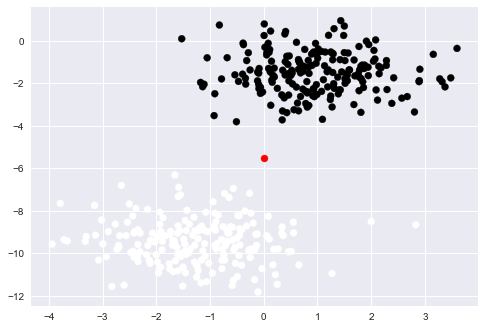

In [80]:
#Visualizaing data
plt.scatter(x_axis,y_axis,c=y)

#KNN does not require any training so we'll directly perform a query

#Generating query point
query=np.array([0,-5.5])
plt.scatter(query[0],query[1],color='red')

# KNN

In [81]:
#Function to calculate eucledian distance between two points
def dist(x1,x2):
    return np.sqrt(sum((x1-x2)**2))
#Function for KNN
def knn(x,y,query_point,k=4):
    vals=[] #array to store distances
    m=x.shape[0]
    
    for i in range(m):
        d=dist(query_point,X[i])
        #list of tuples storing the distance from query point and labels of all points in dataset
        vals.append((d,y[i]))       
        
    #sorting this list 
    vals = sorted(vals)
    
    #Taking k nearest neighbours of the query point
    vals=vals[ :k]
    #converting it to numpy array so we cann perform more operations
    vals=np.array(vals)
    #getting number of different classes and their count
    new_vals=np.unique(vals[: , 1], return_counts='True')
    print(new_vals)
    
    max_frequent_index=new_vals[1].argmax()
    pred=new_vals[0][max_frequent_index]
    
    return pred

In [82]:
x=knn(X,y,query)
print(x)

(array([0., 1.]), array([2, 2], dtype=int64))
0.0
